<a href="https://colab.research.google.com/github/xgross11/UPA2_projekt/blob/main/explor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import missingno as msno
from sklearn import preprocessing

penguins = pd.read_csv("penguins_lter.csv")

--- prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)

In [300]:
print("Jmena sloupcu a jejich typy:\n")
print(penguins.info())

print("\n----------------------------------------\nCharakteristika ciselnych atributu:\n")
print(penguins.describe())

print("\n----------------------------------------\nCharakteristika kategorickych atributu:\n")
include = ['object']
print(penguins.describe(include = include))

print("\n----------------------------------------\nVypis zastoupeni jednotl. hodnot kategorickych atributu")
print("studyName")
print(penguins['studyName'].value_counts())
print("\nSpecies")
print(penguins['Species'].value_counts())
print("\nRegion")
print(penguins['Region'].value_counts())
print("\nIsland")
print(penguins['Island'].value_counts())
print("\nStage")
print(penguins['Stage'].value_counts())
print("\nIndividual ID")
print(penguins['Individual ID'].value_counts())
print("\nClutch Completion")
print(penguins['Clutch Completion'].value_counts())
print("\nDate Egg")
print(penguins['Date Egg'].value_counts())
print("\nSex")
print(penguins['Sex'].value_counts())
print("\nComments")
print(penguins['Comments'].value_counts())

#'''Vypis procentualniho zastoupeni jednotl. hodnot kategorickych atributu'''

#print(penguins['workclass'].value_counts(normalize=True))
#print(penguins['workclass'].value_counts(normalize=True).mul(100).round(1))
#print(penguins['workclass'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')

Jmena sloupcu a jejich typy:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C

--- prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.).

Grafy ciselnych atributu



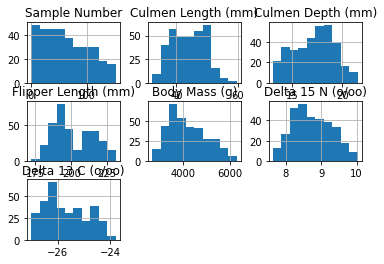

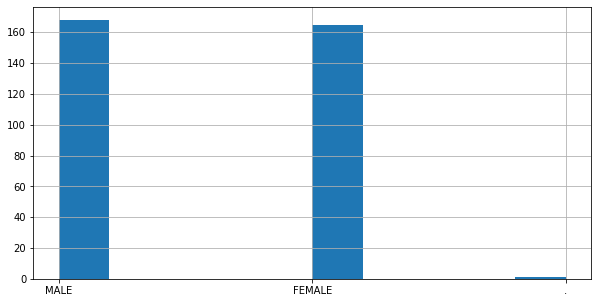


----------------------------------------
Grafy kategorickych atributu



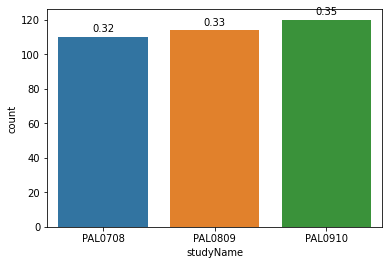

In [301]:
#TODO doplnit grafy-kombinace atributu, nevim si rady jak je nakombinovat do cca 5 grafu
#pro ciselne krabicove nebo histogram

# Culmen Length vs depth for each species
fig = px.scatter(
    penguins,
    x='Culmen Length (mm)',
    y='Culmen Depth (mm)',
    color = 'Species',
    #size='Body Mass (g)',
    #hover_data=['Flipper Length (mm)']
)
fig.show()

print("Grafy ciselnych atributu\n")
penguins.hist()
plt.show()

penguins.Sex.hist(figsize=(10,5))
plt.show()

print("\n----------------------------------------\nGrafy kategorickych atributu\n")
ax = sns.countplot(x = 'studyName',data = penguins)
total = float(len(penguins))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

--- zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty.

In [302]:
fig = make_subplots(rows = 9, cols = 2, horizontal_spacing = 0.05)
row_no = col_no = 1

for col in penguins.columns:
    #if(penguins[col].dtype != "O" and penguins[col].dtype != penguins['Date Egg'].dtype):
    fig.add_trace(
        go.Box(y=penguins[col], name = col),
        row = row_no,
        col = col_no,
    )
    col_no += 1
    if col_no % 3 == 0: # necessary calculations for correctly presenting subplots
        row_no = row_no + 1
        col_no = 1

fig.update_layout(title_text = "Detekce odlehlych hodnot pomoci boxplotu", height=2000, width=1200)
fig.show()

--- proveďte podrobnou analýzu chybějící hodnot (celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.).

Celkovy pocet chybejicich hodnot

363

----------------------------------------
Pocet chybejicich hodnot pro jednotlive atributy

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

----------------------------------------
Procentuelni zastoupeni nulovych hodnot

studyName               0.000000
Sample Number           0.000000
Species                 0.000000
Region                  0.000000
Island                  0.000000
Stage                   0.000000
Individual ID           0.000000
Clutch Completion       0.000000
Date Egg                0.000000
Culmen Length (mm)

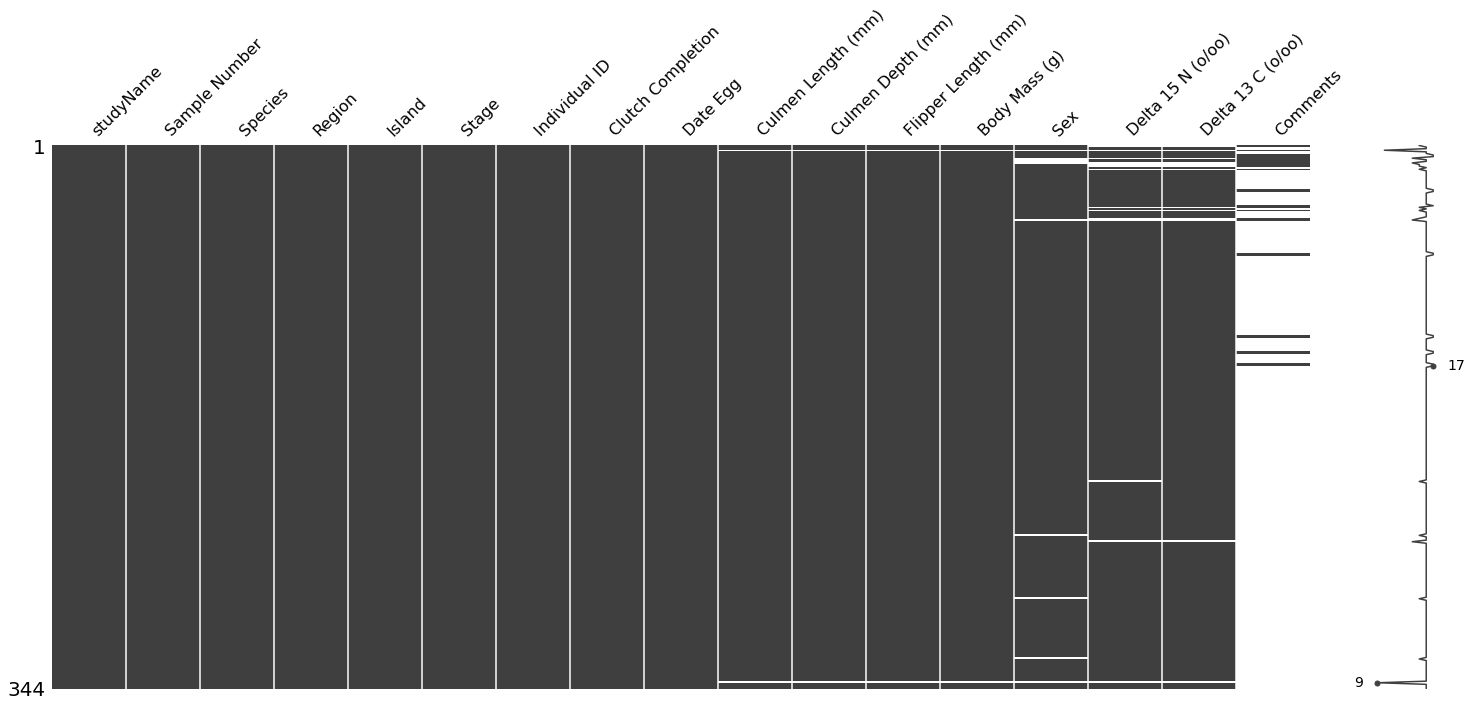

In [303]:
#TODO chybejici hodnoty pro jednotlive radky

print("Celkovy pocet chybejicich hodnot\n")
print(penguins.isnull().sum().sum())

print("\n----------------------------------------\nPocet chybejicich hodnot pro jednotlive atributy\n")
print(penguins.isnull().sum())

print("\n----------------------------------------\nProcentuelni zastoupeni nulovych hodnot\n")
print(penguins.isnull().sum() * 100 / penguins.shape[0]) 

msno.matrix(penguins)
plt.show()


--- proveďte korelační analýzu numerických atributů (k analýze využijte i grafy a korelační koeficienty).

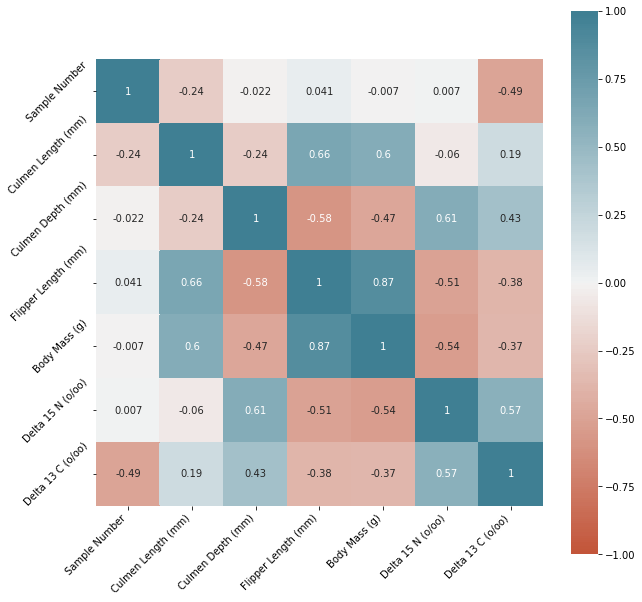

In [304]:
plt.figure(figsize=(10,10))

corr = penguins.corr()

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,

);

plt.show()

# 2. část

--- Odstraňte z datové sady atributy, které jsou pro danou dolovací úlohu irelevantní.

In [305]:
feature_arr = ['Individual ID', "Sample Number", "Comments", 'Region', 'Stage']
penguins.drop(feature_arr, axis = 1, inplace=True, errors = 'ignore')
print(penguins.head)

<bound method NDFrame.head of     studyName                              Species     Island  \
0     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen   
1     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen   
2     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen   
3     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen   
4     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen   
..        ...                                  ...        ...   
339   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe   
340   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe   
341   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe   
342   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe   
343   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe   

    Clutch Completion  Date Egg  Culmen Length (mm)  Culmen Depth (mm)  \
0                 Yes  11/11/07                39.1               18.7   
1                 Yes  11/11/07          

--- Vypořádejte se s chybějícími hodnotami. Pro odstranění těchto hodnot využijte alespoň dvě různé metody pro odstranění chybějících hodnot.

In [306]:
penguins.info()
for col in penguins.columns:
    if penguins[col].dtype != 'object': #for numeric attributes
        penguins[col].fillna(penguins[col].mean(), inplace = True) # using mean to fill null values

penguins= penguins.dropna().reset_index() #delete rows where is null value
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Species              344 non-null    object 
 2   Island               344 non-null    object 
 3   Clutch Completion    344 non-null    object 
 4   Date Egg             344 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    float64
 8   Body Mass (g)        342 non-null    float64
 9   Sex                  334 non-null    object 
 10  Delta 15 N (o/oo)    330 non-null    float64
 11  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(6)
memory usage: 32.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 13 columns):
 #   Column               Non-Null Co

--- Vypořádejte se s odlehlými hodnotami, jsou-li v datové sadě přítomny.

In [307]:
print(penguins.shape)
penguins2 = penguins[penguins.Sex == "."]
adult = penguins.drop(penguins2.index, axis=0)
print(penguins2.shape)
print(adult.shape)
#TODO nevim co dal

(334, 13)
(1, 13)
(333, 13)


###První varianta datové sady

--- Pro jednu variantu datové sady proveďte diskretizaci numerických atributů tak, aby výsledná datová sada byla vhodná pro algoritmy, které vyžadují na vstupu kategorické atributy.

### Druhá varianta datové sady

--- Pro druhou variantu datové sady proveďte vhodnou transformaci kategorických atributů na numerické atributy. Dále pak proveďte normalizaci numerických atributů, které má smysl normalizovat. Výsledná datová sada by měla být vhodná pro metody vyžadující numerické vstupy.

In [308]:
pen2 = penguins
selection = []

for col in penguins.columns:
    if penguins[col].dtype == 'object': #for categoric attributes
      selection.append(col)

print(pen2.head())
enc = preprocessing.OrdinalEncoder()
enc.fit(pen2[selection])
pen2[selection] = enc.transform(pen2[selection])
print(pen2.head())

# normalizace na interval <0,1>
min_max_scaler = preprocessing.MinMaxScaler()
pen2_normalized = min_max_scaler.fit_transform(pen2)
pen2_normalized_df = pd.DataFrame(pen2_normalized)
print(pen2_normalized_df.head())

#pen2 = 
#print(adult.education.value_counts())
#edu = adult[['education','workclass']]
#edu_selection = edu.loc[edu.education.isin([' Bachelors', ' Masters', ' Doctorate'])]
#edu_classes = [' Bachelors', ' Masters', ' Doctorate']
#workclass_classes = [' Private',' Self-emp-inc',' Self-emp-not-inc',' Local-gov',' State-gov',' Federal-gov']
#enc = preprocessing.OrdinalEncoder(categories=[edu_classes,workclass_classes])
#enc.fit(edu_selection)
#edu_selection_transformed = enc.transform(edu_selection)


   index studyName                              Species     Island  \
0      0   PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen   
1      1   PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen   
2      2   PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen   
3      4   PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen   
4      5   PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen   

  Clutch Completion  Date Egg  Culmen Length (mm)  Culmen Depth (mm)  \
0               Yes  11/11/07                39.1               18.7   
1               Yes  11/11/07                39.5               17.4   
2               Yes  11/16/07                40.3               18.0   
3               Yes  11/16/07                36.7               19.3   
4               Yes  11/16/07                39.3               20.6   

   Flipper Length (mm)  Body Mass (g)     Sex  Delta 15 N (o/oo)  \
0                181.0         3750.0    MALE           8.733382   
1         